In [15]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import sys

path_root = "D:/Documentos/Erik/TDR/TDR-Forex/"
sys.path.append(path_root)
from utils.data import load_data
from utils.indicators import get_EMAs

In [28]:
symbol = "EURUSD"; timeframe = "H1"
data = load_data(symbol, timeframe, path_root)
data = data[data.time.dt.year >= 2025].reset_index(drop=True)
data = get_EMAs(data)
data["diff_emas30"] = (data.ema30-data.ema200).ewm(span=30, adjust=False).mean()
data["diff_emas200"] = (data.ema30-data.ema200).ewm(span=200, adjust=False).mean()
data["rsi"] = talib.RSI(data["close"], timeperiod=30)
data["std"] = data["close"].ewm(span=200, adjust=False).std()
display(data.head(2))

,time,open,high,low,close,tick_volume,ema18,ema30,ema200,diff_emas30,diff_emas200,rsi,std
0,2025-01-02 00:00:00,1.03515,1.03571,1.03491,1.03553,876,1.035530,1.03553,1.035530,0.000000,0.000000e+00,NaN,NaN
1,2025-01-02 01:00:00,1.03553,1.03565,1.03462,1.03507,929,1.035482,1.03550,1.035525,-0.000002,-2.497543e-07,NaN,0.000325


### Mitjanes exponencials

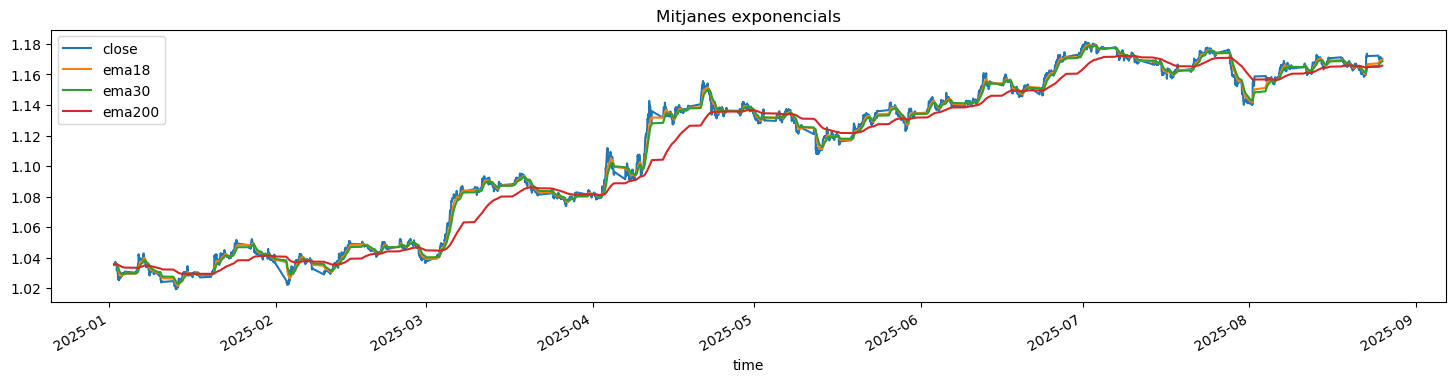

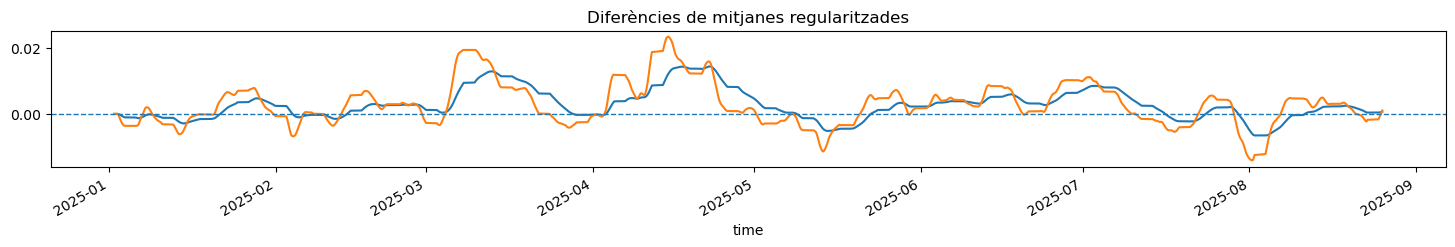

In [29]:
data.set_index("time")[['close', 'ema18', 'ema30', 'ema200']].plot(title="Mitjanes exponencials", figsize=(18,4))
plt.show()
data.set_index("time").diff_emas200.plot(title="Diferències de mitjanes regularitzades", figsize=(18,2))
data.set_index("time").diff_emas30.plot(title="Diferències de mitjanes regularitzades", figsize=(18,2))
plt.axhline(0, linestyle="--", linewidth=1)
plt.show()

### Desviació estàndard

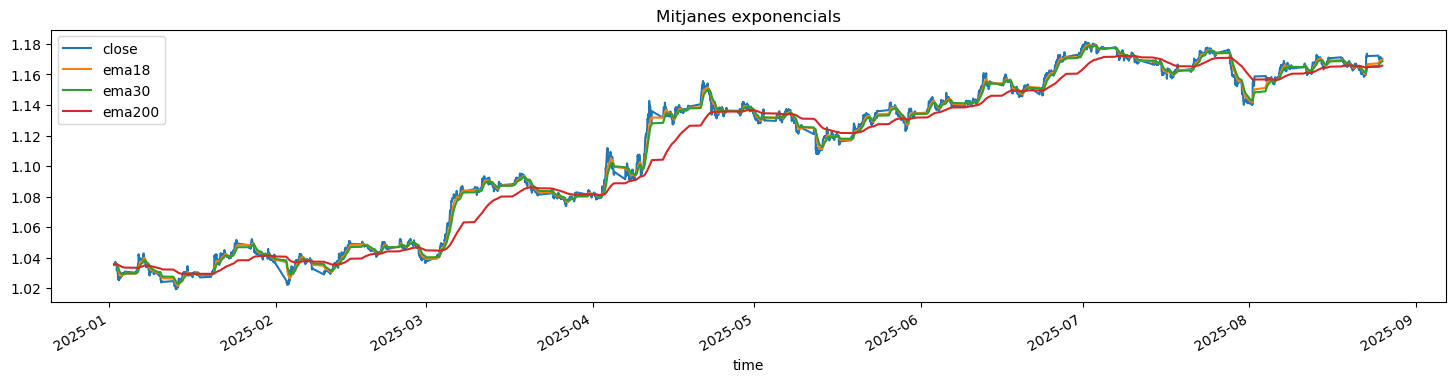

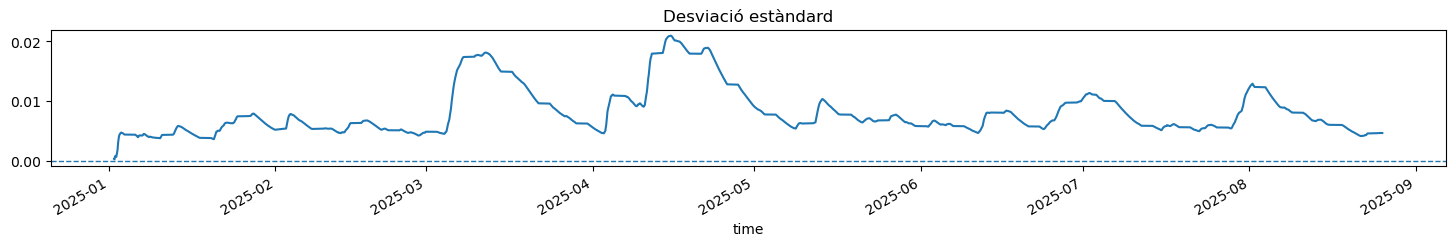

In [30]:
data.set_index("time")[['close', 'ema18', 'ema30', 'ema200']].plot(title="Mitjanes exponencials", figsize=(18,4))
plt.show()
data.set_index("time")["std"].plot(title="Desviació estàndard", figsize=(18,2))
plt.axhline(0, linestyle="--", linewidth=1)
plt.show()

### RSI

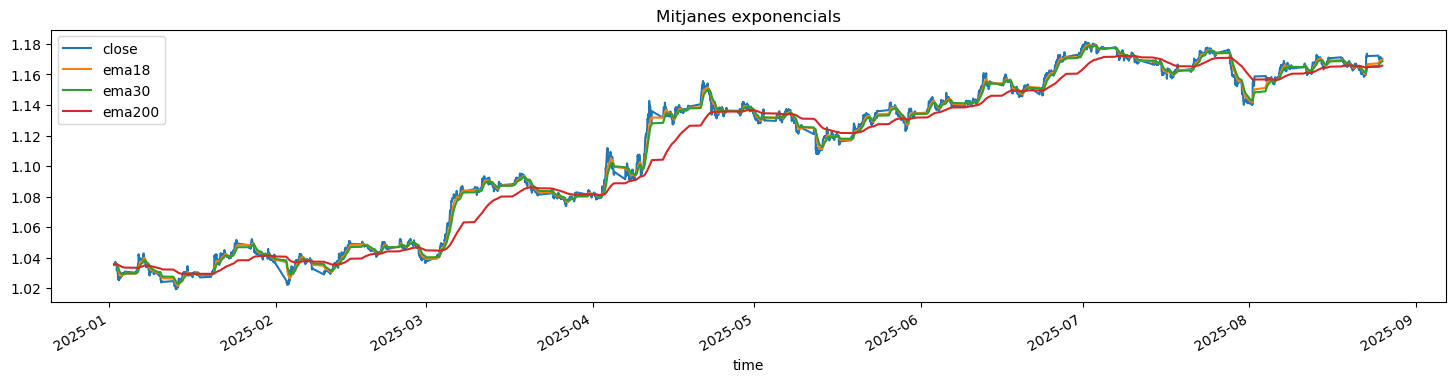

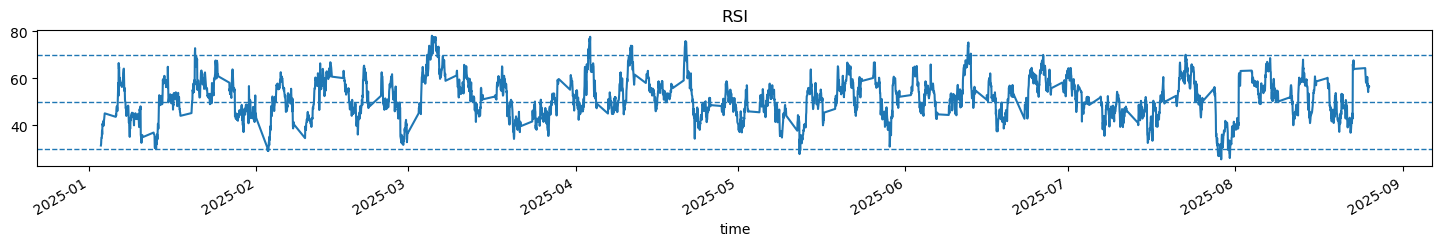

In [31]:
data.set_index("time")[['close', 'ema18', 'ema30', 'ema200']].plot(title="Mitjanes exponencials", figsize=(18,4))
plt.show()
data.set_index("time").rsi.plot(title="RSI", figsize=(18,2))
plt.axhline(70, linestyle="--", linewidth=1)
plt.axhline(50, linestyle="--", linewidth=1)
plt.axhline(30, linestyle="--", linewidth=1)
plt.show()
